<a href="https://colab.research.google.com/github/ModelEngineering/advancing-biomedical-models/blob/master/network-modeling-summer-school/parameter-fitting/Parameter_Fitting_Part_3_Detailed_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARAMETER FITTING DETAILED EXAMPLE**

This section is about parameter fitting, estimating the values of model parameters when they are not known in advance.
Parameters are constants used in models, such as kinetics contants for reactions.
Although there is often knowledge of likely ranges of parameter values, the appropriate value is often unknown
for a specific model.
Examples
of parameters are kinetics constants, Hill equation exponents, and initial concentrations of floating species.

# Preliminaries

In [ ]:
!pip install SBstoat
!pip install tellurium

In [ ]:
# Python packages used in this chapter
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import urllib.request # use this library to download file from GitHub
import tellurium as te
from SBstoat.namedTimeseries import NamedTimeseries, TIME
from SBstoat.modelFitter import ModelFitter
import SBstoat

# Constants and Helper Functions

In [ ]:
def getSharedCodes(moduleName):
  """
  Obtains common codes from the github repository.

  Parameters
  ----------
  moduleName: str
      name of the python module in the src directory
  """
  url = "https://github.com/vporubsky/network-modeling-summer-school/raw/main/src/%s.py" % moduleName
  local_python = "python.py"
  _, _ = urllib.request.urlretrieve(url=url, filename=local_python)
  with open(local_python, "r") as fd:
    codeStr = "".join(fd.readlines())
  print(codeStr)
  exec(codeStr, globals())

# Acquire codes
getSharedCodes("util")

# TESTS
assert(isinstance(LINEAR_PATHWAY_DF, pd.DataFrame))

import pandas as pd
import urllib.request

# Linear pathway data
BASE_URL = "https://github.com/vporubsky/network-modeling-summer-school/raw/main/"
BASE_DATA_URL = "%sdata/" % BASE_URL
BASE_MODULE_URL = "%ssrc/" % BASE_URL
BASE_MODEL_URL = "%smodels/" % BASE_URL
LOCAL_FILE = "local_file.txt"


def getData(csvFilename):
    """
    Creates a dataframe from a CSV structured URL file.

    Parameters
    ----------
    csvFilename: str
        Name of the CSV file (w/o ".csv" extension)

    Returns
    -------
    pd.DataFrame
    """
    url = "%s%s.csv" % (BASE_DATA_URL, csvFilename)
    filename, _ = urllib.request.urlretrieve(url, filename=LOCAL_FILE)
    return pd.read_csv(LOCAL_FILE)

def getModule(moduleName):
    """
    Obtains common codes from the github repository.
  
    Parameters
    ----------
    moduleName: str
        name of the python module in the src directory
    """
    url = "%s%s.py" % (BASE_MODULE_URL, moduleName)
    _, _ = urllib.request.urlretrieve(url, fil

In [ ]:
def plotTS(ts, title=""):
    """
    Plots columns in a timeseries.
    
    Parameters
    ----------
    ts: NamedTimeseries
    """
    p = plt.plot(ts[TIME], ts[ts.colnames])
    _ = plt.legend(p, ts.colnames, bbox_to_anchor=(1.05, 1), loc='upper left')
    _ = plt.title(title)

# Running SBstoat

``SBstoat`` is a python package intended to simplify the programmatic aspects of fitting. The package provides handles the programming details
of the interactions between the optimization codes (``lmfit``) and ``tellurium`` simulations.

The required inputs to ``SBstoat`` are:
- the model for which parameter values are being estimated;
- observational data; and
- specification of the parameters, their value ranges, and initial values.

For the linear pathway model, we ``LINEAR_PATHWAY_MODEL`` and ``LINEAR_PATHWAY_DATA`` for the model and data, respectively.
The description of the paarameters is done using a python dictionary, as shown below.

In [ ]:
# Name, minimal value, initial value, and maximum value of each parameter
LINEAR_PATHWAY_PARAMETERS = [
    SBstoat.Parameter("k1", lower=1, value=50, upper=100),
    SBstoat.Parameter("k2", lower=1, value=50, upper=100),
    SBstoat.Parameter("k3", lower=1, value=50, upper=100),
    SBstoat.Parameter("k4", lower=1, value=50, upper=100),
]

The python class ``ModelFitter`` does fitting for ``SBstoat``. Details of using this can be found below.

In [ ]:
?ModelFitter

In [ ]:
fitter = ModelFitter(LINEAR_PATHWAY_MODEL, 
                     NamedTimeseries(dataframe=LINEAR_PATHWAY_DF), 
                     parametersToFit=LINEAR_PATHWAY_PARAMETERS)
fitter.fitModel()

``SBstoat`` provides a textual report of the results of the fit.

In [ ]:
print(fitter.reportFit())

[[Variables]]
    k1:  1.013537286501992
    k2:  2.1581292045257845
    k3:  3.079339613947712
    k4:  4.280405656551168
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 500
    # variables        = 4
    chi-square         = 102.939841
    reduced chi-square = 0.20754000
    Akaike info crit   = -782.231674
    Bayesian info crit = -765.373241
[[Correlations]] (unreported correlations are < 0.100)
    C(k3, k4) = -0.297
    C(k2, k3) = -0.263
    C(k2, k4) = -0.243
    C(k1, k2) = -0.227
    C(k1, k3) = -0.188
    C(k1, k4) = -0.182


The report is in three sections.

The first section contains measures of the fit quality. The most commonly used measures are chi-square and reduced chai-square.
We want both of these to be "small", although small is relative.
These measures are most useful when comparing different fit results.

The "Variables" section gives parameter estimates. We se that the estimates obtained are fairly close to
the true values in the original models.

The final section provides information about the relationships between parameter estimates. This can be useful
in models where the structure of the model makes it difficult to separate one parameter from another.
In these cases, there will be a large correlation between parameter (absolute) parameter values.

``SBstoat`` provides many plots to aid in understanding the fitting results.
You can see these by typing in a Jupyter code cell ``fitter.pl`` and then pressing the tab key.
Arguably the most useful is ``plotFitAll``, which, for each floating species (column in observed data), plots the fitted and observed values.
This is shown below.

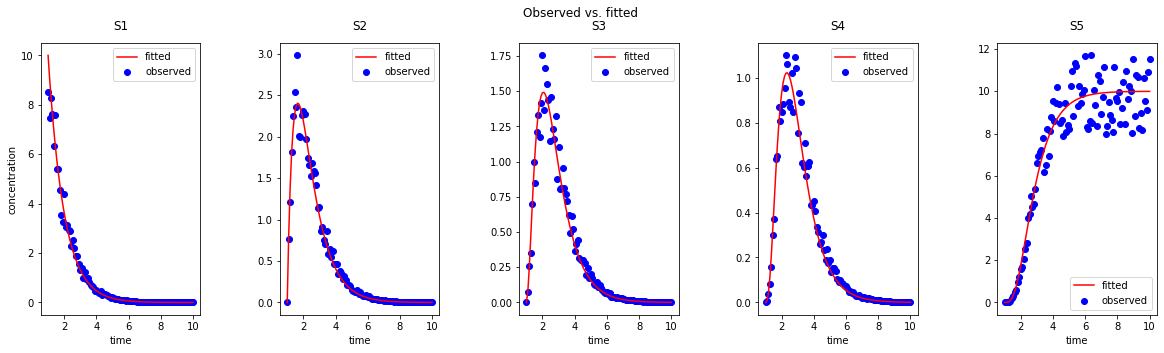

In [ ]:
fitter.plotFitAll(figsize=(20, 5), numCol=5, color=["red", "blue"], titlePosition=(0.5, 1.05))

These fits seem to be quite consistent with the observed data, with the possible exception of ``S5``.
In the latter case, there is considerable variability that likely makes a good fit more difficult.

In [ ]:
# See the options for plotFitAll
?fitter.plotFitAll

If you are interested in a more complete analysis of the residuals, use ``plotResidualsAll``.

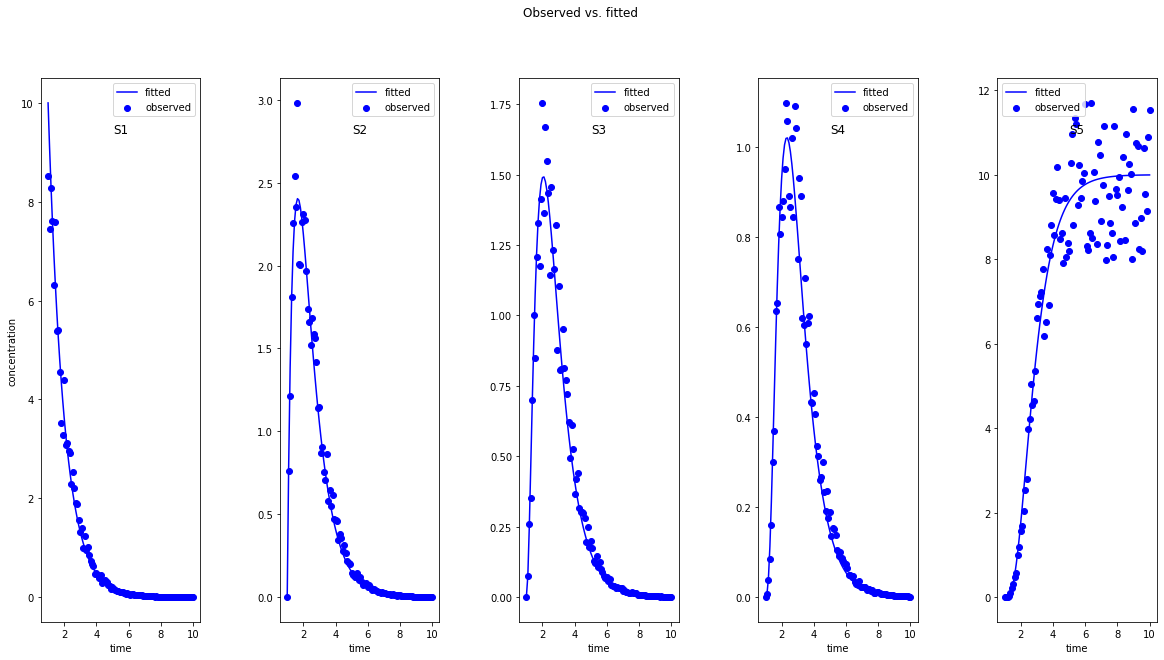

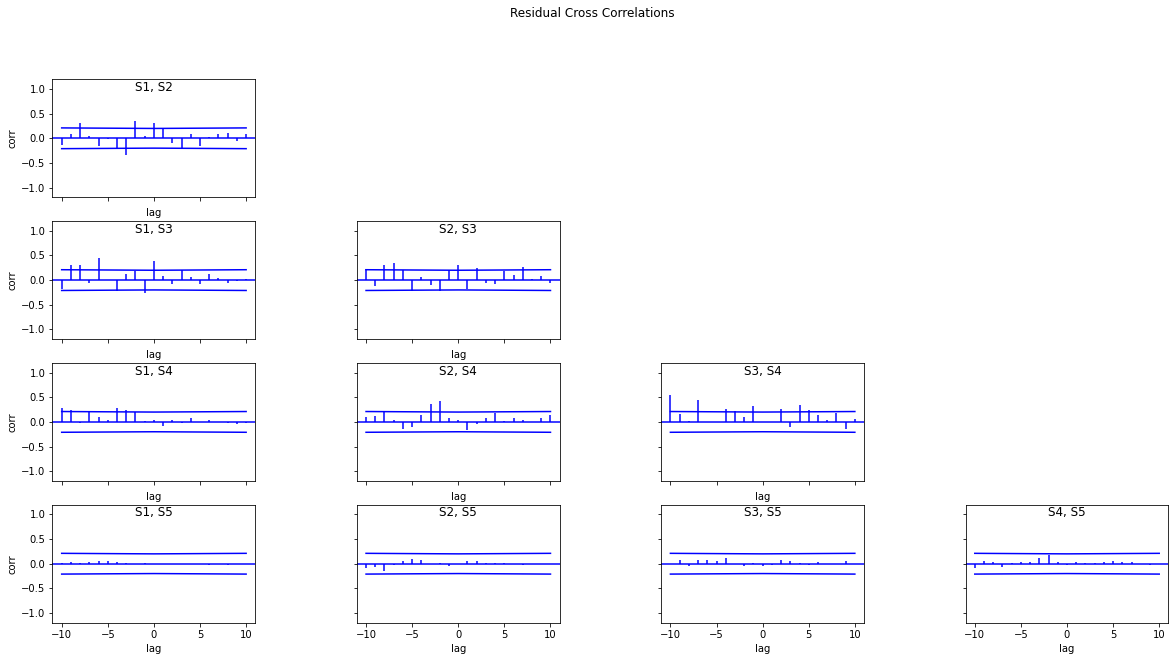

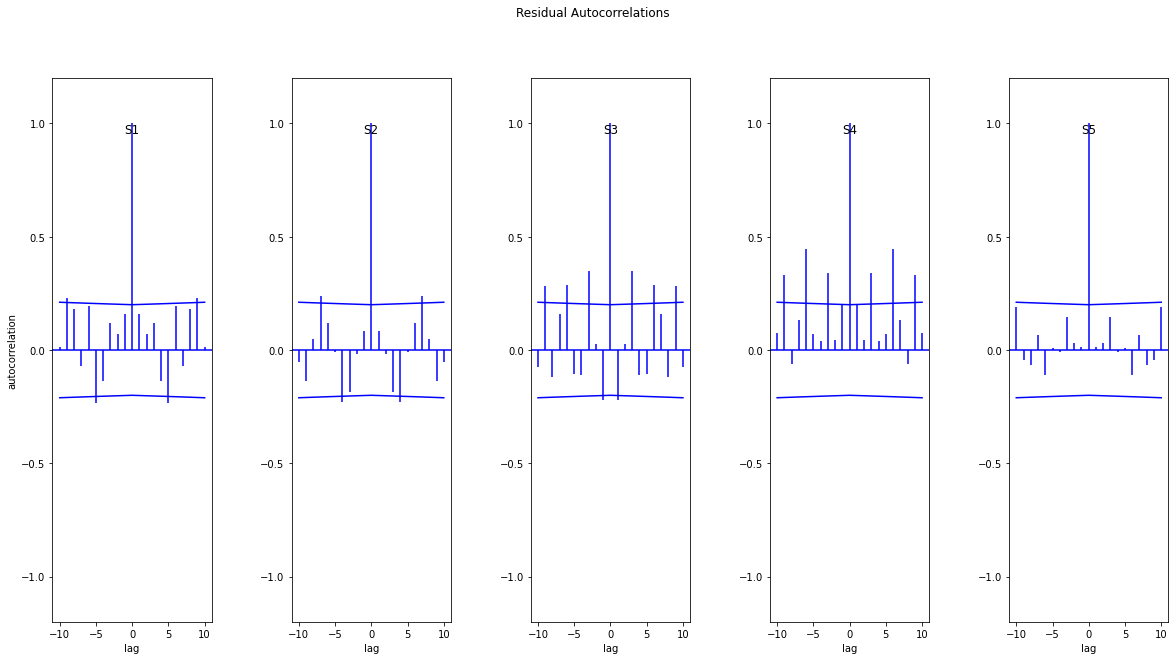

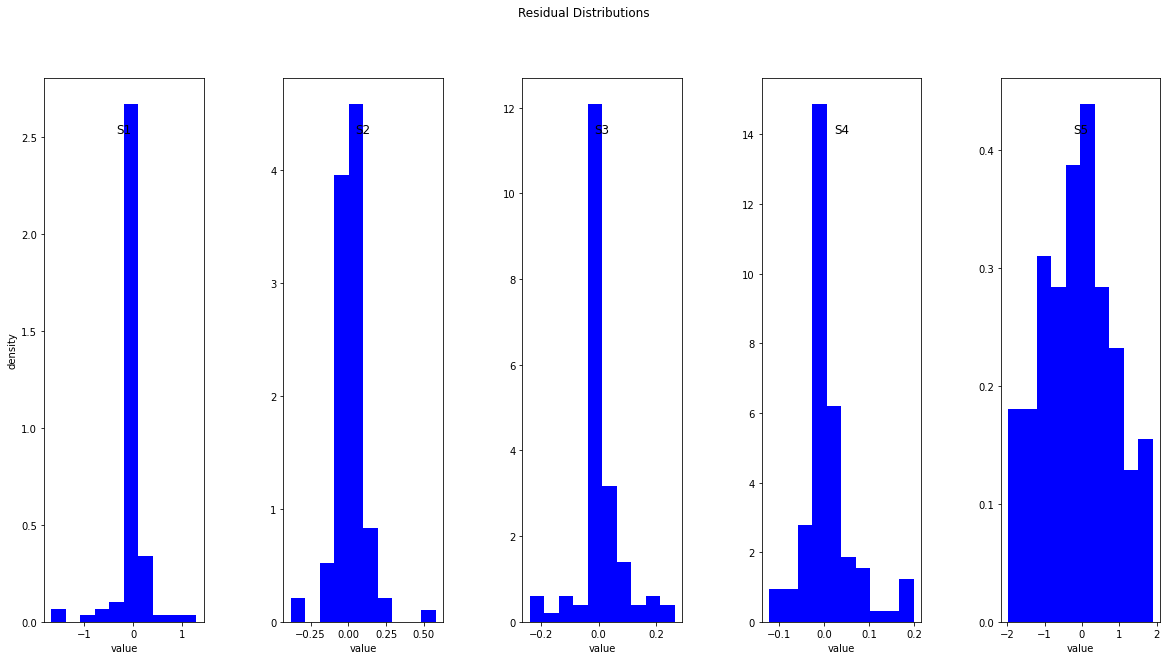

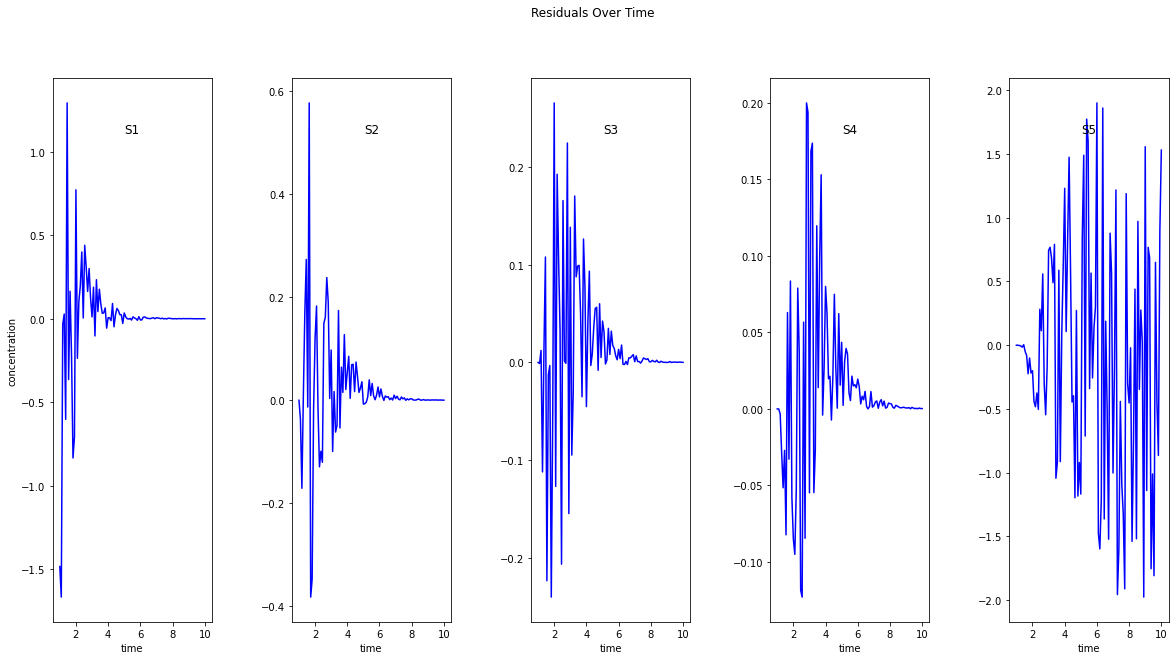

In [ ]:
fitter.plotResidualsAll(figsize=(20, 10))

# Workflow for fitting the Linear Pathway Model

Although ``SBstoat`` eliminates the burden of programming details, fitting is often complex.
This is because of the complexity of the fitting surface, as illustrated earlier in this chaper.
This section illustrates how to use ``SBstoat`` to explore complex fitting surfaces.

``SBstoat`` allows you to explore fitting along three dimensions.
1. **Fitting surface**. The fitting surface changes based on the following:
  a. the selection of float species (columns in the observed data) that we attempt to fit;
  b. the time span we fit over
1. **Search stategy**. This depends on our choice of optimization algorithm. Beyond this, we may choose to use several optimization
algorithms in sequence. Also, some optimization algorithms are stochastic, and so the search strategy may also choose to run
the same algorithm multiple times.
1. **Search start & scope**. This refers to the initial values of parameter values and the range of parameter values that are explored.


In the following explorations of the above dimensions of parameter fitting, we use the above workflow that consists of:
1. Select a subset of the observed data based on a specified time span (in this case, just ending time)
1. Construct a fitter for the linear pathway, observed data, columns to consider in fitting, the fitting methods, and parameter ranges/initial values.
1. Fit the model.
1. Print the fitting report.
1. Plot observed and fitted values.

This workflow is encapsulated in the the function ``doFit``.
The arguments of the function have default that reproduce the
results in the previous section.

In [ ]:
def doFit(selectedColumns=None, 
          endTime=10, 
          fitterMethods=["differential_evolution", "leastsq"], 
          parametersToFit=LINEAR_PATHWAY_PARAMETERS,
          isTest=False):
    """
    Fits the linear pathway model.

    Parameters
    ----------
    selectedColumns: list-str
    endTime: int
    fitterMethods: list-str
    parametersToFit: list-SBstoat.Parameter
    isTest: bool
        Test mode
    """
    model = te.loada(LINEAR_PATHWAY_MODEL)
    observedTS = NamedTimeseries(dataframe=LINEAR_PATHWAY_DF)
    # Find the last index to use
    lastIdx = len([t for t in observedTS[TIME] if t <= endTime])
    observedTS = observedTS[:lastIdx]
    # Construct the fitter and do the fit
    fitter = ModelFitter(model, observedTS, selectedColumns=selectedColumns, 
                         fitterMethods=fitterMethods, 
                         parametersToFit=LINEAR_PATHWAY_PARAMETERS)
    fitter.fitModel()
    if not isTest:
        print(fitter.reportFit())
        fitter.plotFitAll(figsize=(20, 5), numCol=5, color=["red", "blue"],
                          titlePosition=(0.5, 1.05))
        return None
    else:
        return fitter

# TESTS
result = doFit(isTest=True)
assert(isinstance(fitter, ModelFitter))

[[Variables]]
    k1:  1.0135372111096093
    k2:  2.1581298558491326
    k3:  3.0793401650853585
    k4:  4.280399427228071
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 500
    # variables        = 4
    chi-square         = 102.939841
    reduced chi-square = 0.20754000
    Akaike info crit   = -782.231674
    Bayesian info crit = -765.373241
[[Correlations]] (unreported correlations are < 0.100)
    C(k3, k4) = -0.297
    C(k2, k3) = -0.263
    C(k2, k4) = -0.243
    C(k1, k2) = -0.227
    C(k1, k3) = -0.188
    C(k1, k4) = -0.182


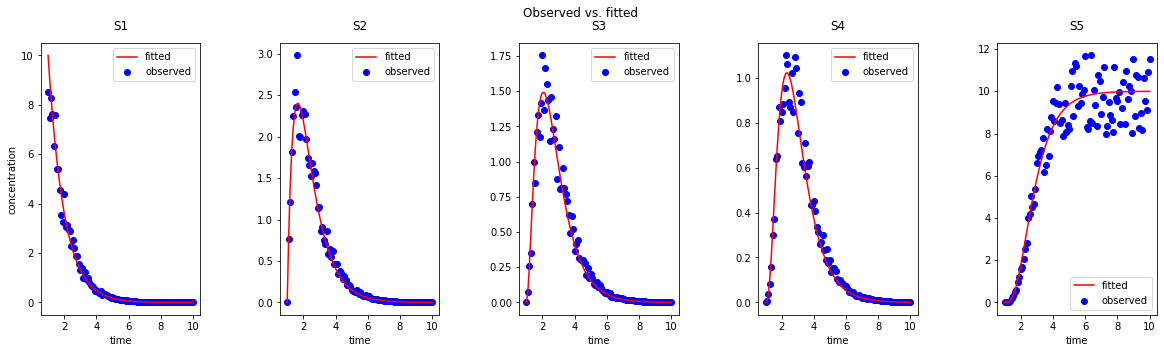

In [ ]:
doFit()

## Fitting Surface

We begin by exploring the effect of the fitting surface. Suppose that we only consider ``S5`` and so the fitting surface is residuals
from fitting ``S5``.

[[Variables]]
    k1:  1.0739454417420078
    k2:  2.8523544791101307
    k3:  2.852163658820199
    k4:  2.8524960734122766
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 100
    # variables        = 4
    chi-square         = 90.7507587
    reduced chi-square = 0.94532040
    Akaike info crit   = -1.70533523
    Bayesian info crit = 8.71534551
[[Correlations]] (unreported correlations are < 0.100)
    C(k2, k4) = -0.974
    C(k2, k3) = -0.969
    C(k3, k4) =  0.887
    C(k1, k3) = -0.855
    C(k1, k2) =  0.726
    C(k1, k4) = -0.568


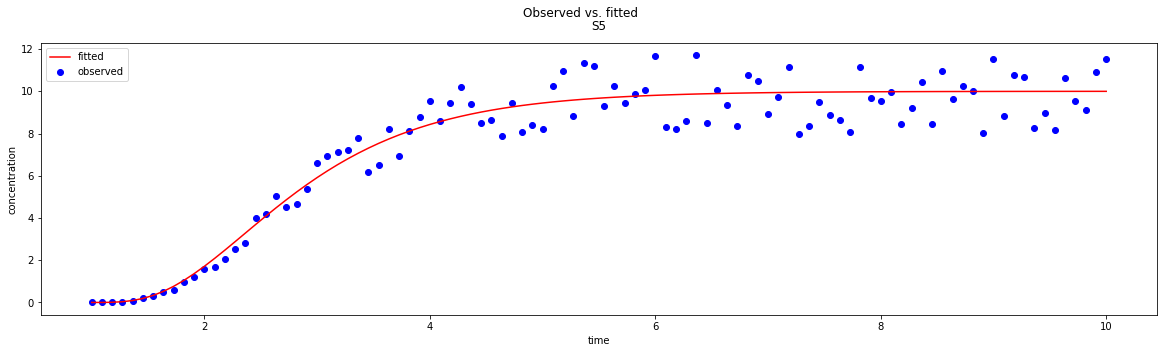

In [ ]:
doFit(selectedColumns=["S5"])

We see that the fitted line does not match well the dynamics in the observed data. Another observation is that the chi-square increased
by a factor of 10.
In general, we recommend that all floating species be used.

Another consideration is to focus on a subset of the dynamics. Below, we only consider through 6 seconds.

[[Variables]]
    k1:  1.024344697578151
    k2:  2.1600621567253557
    k3:  3.0739009998680964
    k4:  4.260549988174826
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 280
    # variables        = 4
    chi-square         = 43.1151131
    reduced chi-square = 0.15621418
    Akaike info crit   = -515.856484
    Bayesian info crit = -501.317326
[[Correlations]] (unreported correlations are < 0.100)
    C(k3, k4) = -0.297
    C(k2, k3) = -0.263
    C(k2, k4) = -0.242
    C(k1, k2) = -0.227
    C(k1, k3) = -0.188
    C(k1, k4) = -0.183


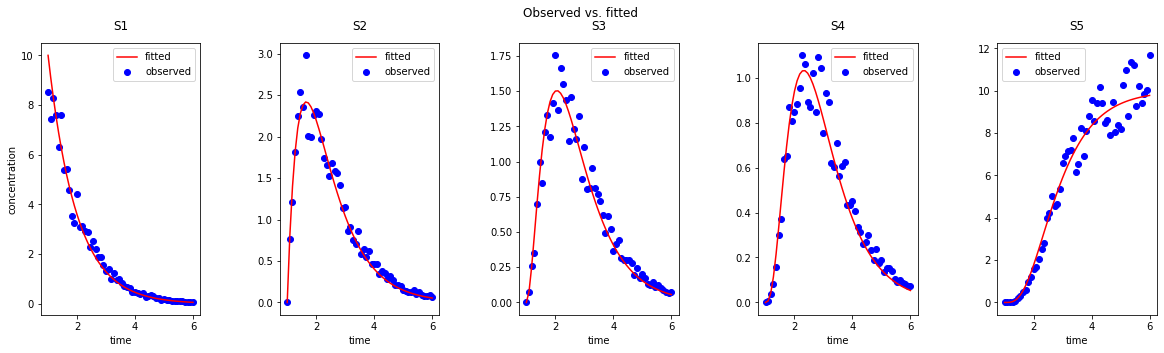

In [ ]:
doFit(endTime=6)

This improved the quality of the fit. We see this visually in the above plots and also in the significant reduction in chi-square. A lot of this improvement
is a result of not inluding regions of high variability in observed values for ``S5``.

## Search Strategy

The main consideration here is the choice of optimization algorithms.
Any valid ``method`` for ``lmfit`` can be used, and multiple methods can be used in combination. We illustrate this below.

[[Variables]]
    k1:  1.013537272208723
    k2:  2.1581300220005524
    k3:  3.079339166352762
    k4:  4.280404936773545
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 47
    # data points      = 500
    # variables        = 4
    chi-square         = 102.939841
    reduced chi-square = 0.20754000
    Akaike info crit   = -782.231674
    Bayesian info crit = -765.373241
[[Correlations]] (unreported correlations are < 0.100)
    C(k3, k4) = -0.297
    C(k2, k3) = -0.263
    C(k2, k4) = -0.243
    C(k1, k2) = -0.227
    C(k1, k3) = -0.188
    C(k1, k4) = -0.182


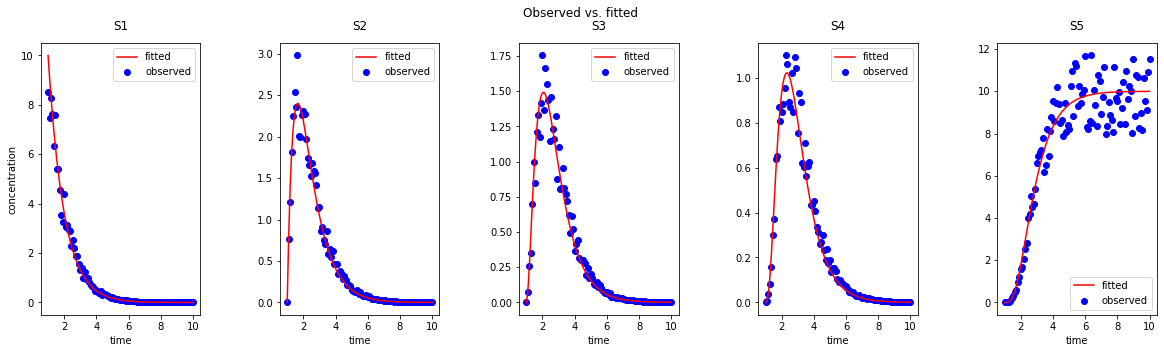

In [ ]:
# Fit with Levenberg-Marquardt 
doFit(fitterMethods=["leastsq"])

[[Variables]]
    k1:  1.0135367627228469
    k2:  2.15813062035096
    k3:  3.079349923288472
    k4:  4.280390683110541
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 1795
    # data points      = 500
    # variables        = 4
    chi-square         = 102.939841
    reduced chi-square = 0.20754000
    Akaike info crit   = -782.231674
    Bayesian info crit = -765.373241
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.


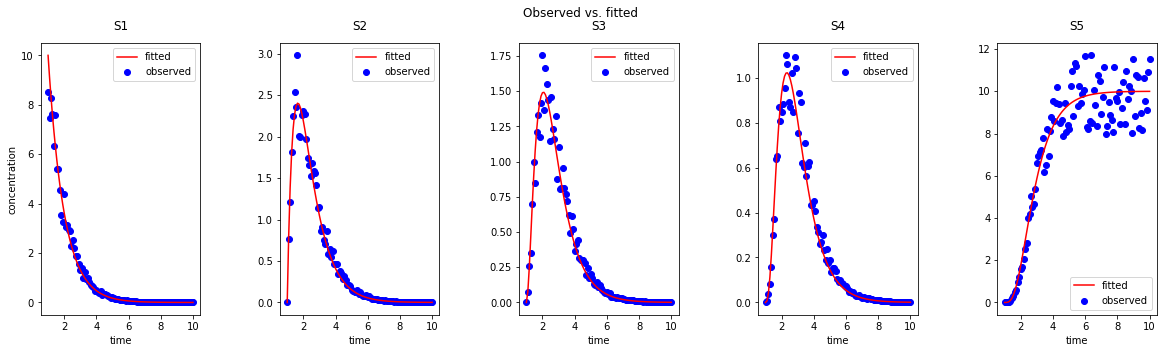

In [ ]:
# Fit with differential evolution
doFit(fitterMethods=["differential_evolution"])

[[Variables]]
    k1:  1.0135372839258343
    k2:  2.158129626950874
    k3:  3.079339828548486
    k4:  4.280399771665452
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 500
    # variables        = 4
    chi-square         = 102.939841
    reduced chi-square = 0.20754000
    Akaike info crit   = -782.231674
    Bayesian info crit = -765.373241
[[Correlations]] (unreported correlations are < 0.100)
    C(k3, k4) = -0.297
    C(k2, k3) = -0.263
    C(k2, k4) = -0.243
    C(k1, k2) = -0.227
    C(k1, k3) = -0.188
    C(k1, k4) = -0.182


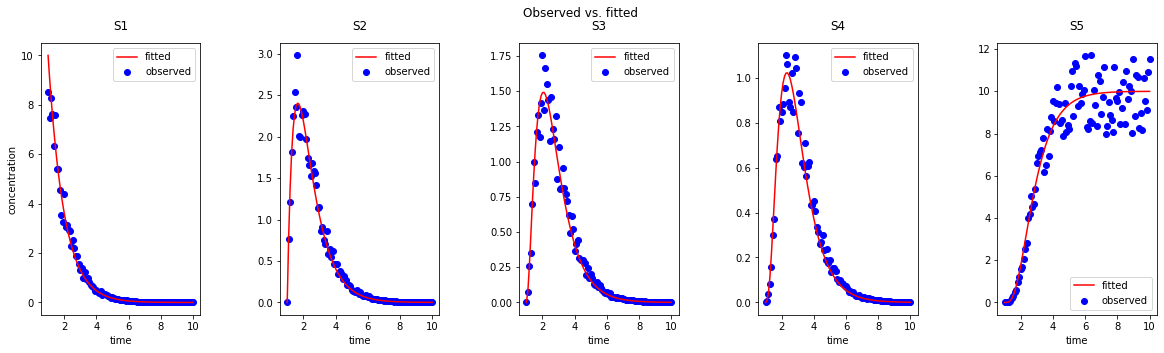

In [ ]:
# Fit with differential evolution and then Levenberg-Marquardt 
doFit(fitterMethods=["differential_evolution", "leastsq"])

For this model, we see that Levenberg-Marquardt works better than differential evolution, and doing the two in combination offers no benefit.

## Search Start & Scope

Where we start the search and how far we search depends on the ranges of parameter values and the specification of initial values.
This is specified by the ``parameterDct`` argument to ``ModelFitter``. This argument defaults to ``LINEAR_PATHWAY_PARAMETER_DCT``.

In [ ]:
# Dictionary values are: lower end of parameter range, initial parameter value, upper end of parameter range
LINEAR_PATHWAY_PARAMETER_DCT

{'k1': (1, 50, 100),
 'k2': (1, 50, 100),
 'k3': (1, 50, 100),
 'k4': (1, 50, 100)}

If we create a bad parameter range, then we get very poor fits. Below, we start the search with a negative value for each parameter.
Note that the observed values appear to be constant because of the large scale of the fitted values.

[[Variables]]
    k1:  1.013537265185973
    k2:  2.1581301399730997
    k3:  3.0793390991943985
    k4:  4.280396375190202
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 500
    # variables        = 4
    chi-square         = 102.939841
    reduced chi-square = 0.20754000
    Akaike info crit   = -782.231674
    Bayesian info crit = -765.373241
[[Correlations]] (unreported correlations are < 0.100)
    C(k3, k4) = -0.297
    C(k2, k3) = -0.263
    C(k2, k4) = -0.243
    C(k1, k2) = -0.227
    C(k1, k3) = -0.188
    C(k1, k4) = -0.182


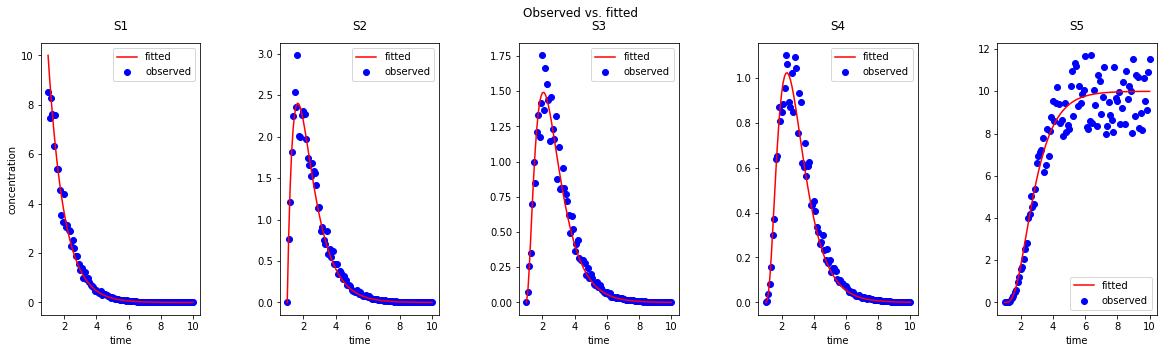

In [ ]:
parametersToFit = [
    SBstoat.Parameter("k1", lower=-11, value=-1, upper=100),
    SBstoat.Parameter("k2", lower=-11, value=-1, upper=100),
    SBstoat.Parameter("k3", lower=-11, value=-1, upper=100),
    SBstoat.Parameter("k4", lower=-11, value=-1, upper=100),
    ]
doFit(parametersToFit=parametersToFit)

In [ ]:
# Exercise